In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [335]:
df = pd.read_csv("data/boligsiden_3.csv")

df.drop("Unnamed: 0", axis = 1, inplace = True)

#df.drop("Unnamed: 0.1", axis = 1, inplace = True)

df['energyLabel'].isnull().sum()

1299

In [336]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)


In [337]:
df

,addressType,caseUrl,daysOnMarket,lotArea,monthlyExpense,perAreaPrice,priceCash,priceChangePercentage,housingArea,numberOfFloors,...,energyLabel,basementArea,numberOfBuildings,zipCode,municipality,municipalityCode,latitude,longitude,basement,lot
2,villa,https://www.maegleren.dk/sag.aspx?mgl=2563&sag...,0,3700.0,1457,3662.0,745000,0.00,203.0,2.0,...,d,0.0,2,9640,Vesthimmerlands,820,56.833515,9.288974,0,1
4,villa,https://www.danbolig.dk?propertyid=2910000159&...,0,8447.0,2610,14407.0,2295000,0.00,152.0,1.0,...,d,0.0,2,4690,Faxe,320,55.333633,12.050508,0,1
5,terraced house,https://home.dk/sag/6010001100,0,252.0,2409,24042.0,2885000,0.00,120.0,1.0,...,a2010,0.0,3,8920,Randers,730,56.460293,9.950580,0,1
6,condo,http://www.nybolig.dk/maegler/pages/property-p...,0,0.0,4710,54389.0,4895000,0.00,90.0,1.0,...,c,5.0,2,2970,Hørsholm,223,55.879630,12.503443,1,0
7,villa,https://www.lokalbolig.dk/?sag=22-X0001451,0,902.0,5768,38811.0,7995000,0.00,206.0,1.0,...,a2015,0.0,1,4320,Lejre,350,55.597050,11.958364,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,villa,http://www.estate-maeglerne.dk/maegler/pages/p...,46,626.0,6028,51179.0,8250000,0.00,187.0,3.0,...,e,93.0,2,2700,København,101,55.708690,12.463124,1,1
9995,villa,https://home.dk/sag/8060000791,46,800.0,2008,21733.0,2195000,0.00,97.0,1.0,...,c,0.0,2,9200,Aalborg,851,57.008976,9.818135,0,1
9996,condo,http://www.estate-maeglerne.dk/maegler/pages/p...,46,0.0,2871,27438.0,2195000,-4.36,80.0,3.0,...,d,0.0,6,2600,Glostrup,161,55.659950,12.405232,0,0
9998,farm,https://home.dk/sag/9160001106,46,33650.0,2862,7847.0,2495000,0.00,158.0,3.0,...,c,8.0,9,5772,Faaborg-Midtfyn,430,55.163677,10.550933,1,1


In [338]:
addresses = df.addressType.unique().tolist()

In [339]:
np.sort(df.energyLabel.unique().tolist())

array(['a', 'a1', 'a2', 'a2010', 'a2015', 'a2020', 'b', 'c', 'd', 'e',
       'f', 'g'], dtype='<U5')

In [340]:
df['energyLabel'].isnull().sum()

0

In [341]:
# This cell generates the list addresses_list, that sorts the address types by their respective number of observations
# That list is then used to plot the histograms - on top of each other -


sums = []
for element in df.addressType.unique():
    sums.append(sum(df.addressType == element))

sums

addresses_list = [x for _, x in sorted(zip(sums, addresses))]

print(addresses_list)

addresses_list = addresses_list[::-1]

addresses_list

['full year plot', 'holiday house', 'villa apartment', 'hobby farm', 'cooperative', 'farm', 'terraced house', 'condo', 'villa']


['villa',
 'condo',
 'terraced house',
 'farm',
 'cooperative',
 'hobby farm',
 'villa apartment',
 'holiday house',
 'full year plot']

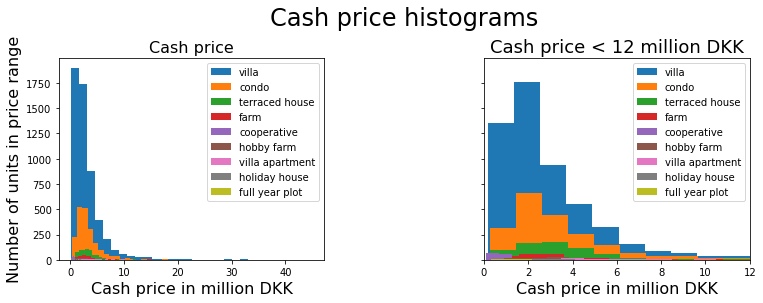

In [372]:
f, ax = plt.subplots(1,2, sharey = True, figsize = (12,4))

f.suptitle("Cash price histograms", size = 24)

for element in addresses_list:
    ax[0].hist(df["priceCash"][df.addressType == element]/1000000, bins = 30, label = element)
ax[0].set_xlabel("Cash price in million DKK", size = 16)
ax[0].legend()
ax[0].set_title("Cash price", size = 16)
ax[0].set_ylabel("Number of units in price range", size = 16)


for element in addresses_list:
    ax[1].hist(df["priceCash"][(df.addressType == element) & (df.priceCash < 12000000)]/1000000, bins = 10, label = element)
ax[1].set_xlabel("Cash price in million DKK", size = 16)
ax[1].set_xlim(0,12)
ax[1].set_title("Cash price < 12 million DKK", size = 18)
ax[1].legend()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.6, 
                    hspace=0.4)
#f.savefig("figures/hist_cash_price.png")

In [343]:
#df.describe([df])

In [344]:
X_simple_all = pd.read_csv("data/X_all_dummies.csv")

In [345]:
X_simple_all.drop("Unnamed: 0", axis = 1, inplace = True)

In [346]:
#X_simple_all

In [347]:
X_simple_all.describe()

,daysOnMarket,lotArea,monthlyExpense,housingArea,numberOfFloors,numberOfRooms,yearBuilt,basementArea,condo,cooperative,...,Tårnby,Tønder,Vallensbæk,Varde,Vejen,Vejle,Vesthimmerlands,Viborg,Vordingborg,Ærø
count,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,...,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000,8672.000000
mean,21.750461,3623.166052,2825.183464,133.845018,1.688653,4.353782,1949.749193,14.974400,0.233510,0.017297,...,0.007957,0.005996,0.002652,0.009571,0.008879,0.017758,0.007611,0.015798,0.008879,0.002191
std,14.293390,19374.644536,1531.237554,58.012885,1.141846,1.684099,57.252042,37.122762,0.423088,0.130383,...,0.088850,0.077208,0.051434,0.097368,0.093815,0.132079,0.086912,0.124700,0.093815,0.046759
min,0.000000,0.000000,399.000000,5.000000,1.000000,1.000000,1200.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,116.750000,1863.000000,95.000000,1.000000,3.000000,1927.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,735.000000,2449.500000,128.000000,1.000000,4.000000,1962.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1001.000000,3378.250000,163.000000,2.000000,5.000000,1976.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,46.000000,522015.000000,26954.000000,1071.000000,30.000000,23.000000,2025.000000,1172.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


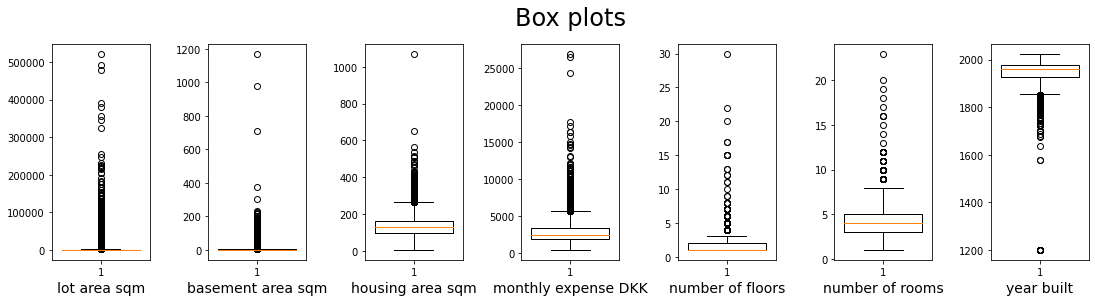

In [373]:
variables = ['lotArea',
             'basementArea',
             'housingArea',
             'monthlyExpense',
             'numberOfFloors',
             'numberOfRooms',
             'yearBuilt']
variables2 = ['lot area sqm',
             'basement area sqm',
             'housing area sqm',
             'monthly expense DKK',
             'number of floors',
             'number of rooms',
             'year built']


f, ax = plt.subplots(1,len(variables), figsize = (18,4))
f.suptitle("Box plots", size = 24)
i = 0
for var in variables:
    ax[i].boxplot(X_simple_all[var], widths = 0.8)
    ax[i].set_xlabel(variables2[i], size = 14)
    i = i + 1
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.85, 
                    wspace=0.6, 
                    hspace=0.4)
"""ax[0].legend()
ax[0].set_title("Cash price", size = 16)
ax[0].set_ylabel("Number of units in price range", size = 14)"""
#for var in variables:
f.savefig("figures/boxplots_7.png",bbox_inches='tight')

In [349]:
X_simple_all.iloc[:,19:31].columns

Index(['a', 'a1', 'a2', 'a2010', 'a2015', 'a2020', 'b', 'c', 'd', 'e', 'f',
       'g'],
      dtype='object')

In [350]:
l1 = []
l2 = []
for i in range(0,31-19,1):
    print(X_simple_all.iloc[:,19:31].columns[i], sum(X_simple_all.iloc[:,19:31].iloc[:,i]))
    l1.append(X_simple_all.iloc[:,19:31].columns[i])
    l2.append(sum(X_simple_all.iloc[:,19:31].iloc[:,i]))
my_df = pd.DataFrame(list(zip(l1, l2)),
              columns=['energy label','number of observations'])
df_energy_obs = my_df.set_index('energy label')

df_energy_obs
df_energy_obs.style.to_latex("tables/energy_types.tex")

a 1
a1 1
a2 5
a2010 271
a2015 301
a2020 137
b 626
c 2872
d 2694
e 991
f 523
g 250


In [351]:
l1 = []
l2 = []
for i in range(0,X_simple_all.shape[1]-31,1):
    #print(X_simple_all.iloc[:,31:].columns[i], sum(X_simple_all.iloc[:,31:].iloc[:,i]))
    l1.append(X_simple_all.iloc[:,31:].columns[i])
    l2.append(sum(X_simple_all.iloc[:,31:].iloc[:,i]))

my_df = pd.DataFrame(list(zip(l1, l2)),
              columns=['municipality','number of observations'])
df_municipality_obs = my_df.set_index('municipality')

df_municipality_obs

,number of observations
municipality,
Aabenraa,59
Aalborg,313
Aarhus,508
Albertslund,16
Allerød,25
...,...
Vejle,154
Vesthimmerlands,66
Viborg,137


In [352]:
l1 = []
l2 = []
for i in range(0,X_simple_all.shape[1]-31,1):
    #print(X_simple_all.iloc[:,31:].columns[i], sum(X_simple_all.iloc[:,31:].iloc[:,i]))
    l1.append(X_simple_all.iloc[:,31:].columns[i])
    l2.append(sum(X_simple_all.iloc[:,31:].iloc[:,i]))

my_df = pd.DataFrame(list(zip(l1, l2)),
              columns=['municipality','number of observations'])
df_municipality_obs = my_df.set_index('municipality')

df_municipality_obs
df_municipality_obs.style.to_latex("tables/municipality_types.tex")

In [353]:
X_simple_all.iloc[:,8:19]

,condo,cooperative,farm,full year plot,hobby farm,holiday house,terraced house,villa,villa apartment,basement,lot
0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
8667,0,0,0,0,0,0,0,1,0,1,1
8668,0,0,0,0,0,0,0,1,0,0,1
8669,1,0,0,0,0,0,0,0,0,0,0
8670,0,0,1,0,0,0,0,0,0,1,1


In [354]:
l1 = []
l2 = []
for i in range(0,19-8,1):
    #print(X_simple_all.iloc[:,31:].columns[i], sum(X_simple_all.iloc[:,31:].iloc[:,i]))
    l1.append(X_simple_all.iloc[:,8:19].columns[i])
    l2.append(sum(X_simple_all.iloc[:,8:19].iloc[:,i]))

my_df = pd.DataFrame(list(zip(l1, l2)),
              columns=['address type','number of observations'])
df_addresstype_obs = my_df.set_index('address type')

df_addresstype_obs.style.to_latex("tables/address_types.tex")

In [393]:
df_municipality_obs["number of observations"].idxmin()

'Læsø'

In [395]:
df_municipality_obs["number of observations"].min()

5

In [394]:
df_municipality_obs["number of observations"].idxmax()

'København'

In [396]:
df_municipality_obs["number of observations"].max()

758